In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# EDA

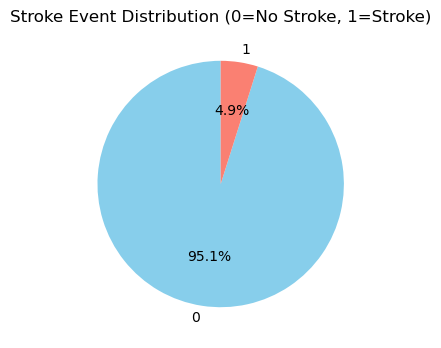

In [7]:
plt.figure(figsize=(4,4))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Stroke Event Distribution (0=No Stroke, 1=Stroke)')
plt.ylabel('')
plt.show()

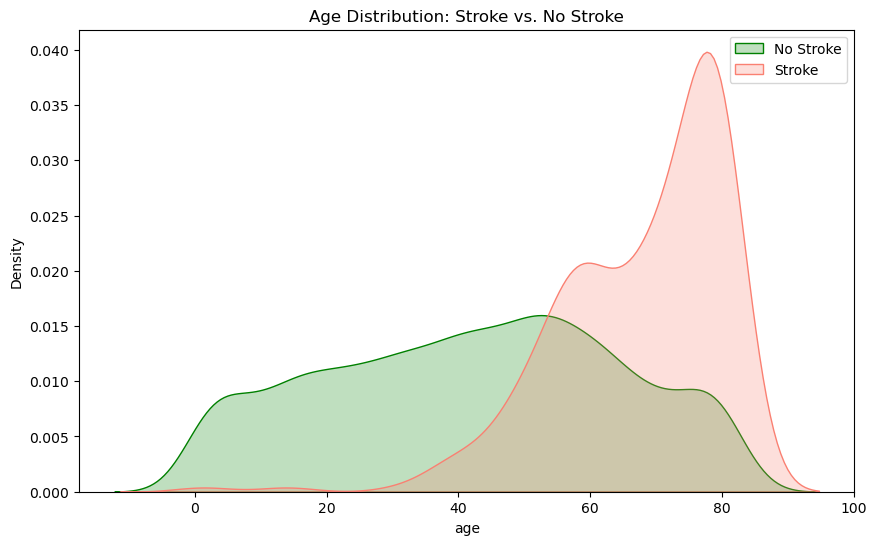

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['stroke'] == 0], x='age', fill=True, color='green', label='No Stroke')
sns.kdeplot(data=df[df['stroke'] == 1], x='age', fill=True, color='salmon', label='Stroke')
plt.title('Age Distribution: Stroke vs. No Stroke')
plt.legend()
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_22780\2514193479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='coolwarm')


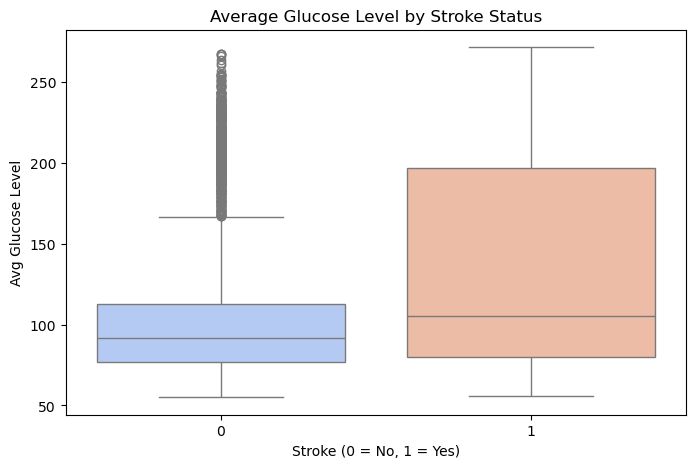

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='coolwarm')
plt.title('Average Glucose Level by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Avg Glucose Level')
plt.show()

# Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [12]:
df = df.drop('id', axis=1)

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df['bmi'].fillna(df['bmi'].mean(skipna=True), inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_22780\891021120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(skipna=True), inplace=True)


In [15]:
label_enc = LabelEncoder()

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])


    

In [16]:
scaler = StandardScaler()
X = df.drop('stroke', axis=1) 
y = df['stroke']              

X_scaled = scaler.fit_transform(X[X.columns])

X_final = pd.DataFrame(X_scaled, columns=X.columns)




# Model Training


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")


models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
recall_results={}
y_prediction_values={}

print("\nMODEL PERFORMANCE REPORTS: ")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prediction_values[name]=y_pred
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    recall_results[name]=recall_score(y_test, y_pred=y_pred)
    
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report: ")
    print(classification_report(y_test, y_pred))




Training Shape: (4088, 10)
Testing Shape: (1022, 10)

MODEL PERFORMANCE REPORTS: 

Logistic Regression
Accuracy: 0.7495

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022


Decision Tree
Accuracy: 0.9207

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.24      0.15      0.18        62

    accuracy                           0.92      1022
   macro avg       0.59      0.56      0.57      1022
weighted avg       0.90      0.92      0.91      1022


K-Nearest Neighbors
Accuracy: 0.9393

Classification Report: 
              precision    recall  f1-score   support

           0       0.94   

c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest
Accuracy: 0.9384

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



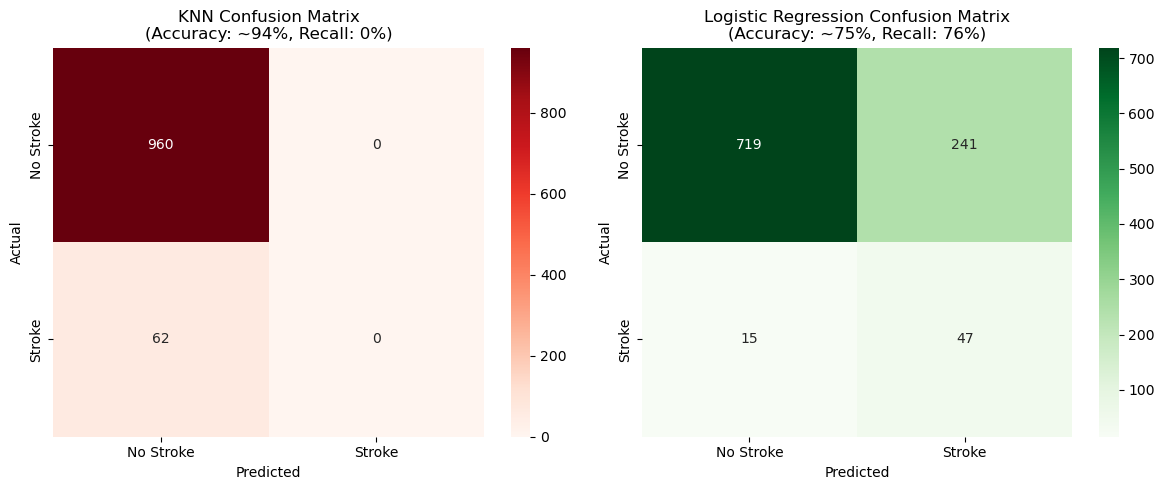

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Generate Confusion Matrices
# (Make sure 'y_test', 'lr_pred' (Logistic), and 'knn_pred' (KNN) are ready from your previous code)

cm_knn = confusion_matrix(y_test, y_prediction_values['K-Nearest Neighbors'])
cm_lr = confusion_matrix(y_test, y_prediction_values['Logistic Regression'])

# 2. Plot Side-by-Side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KNN (The High Accuracy, Low Recall Model)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title('KNN Confusion Matrix\n(Accuracy: ~94%, Recall: 0%)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['No Stroke', 'Stroke'])
axes[0].set_yticklabels(['No Stroke', 'Stroke'])

# Plot Logistic Regression (The Low Accuracy, High Recall Model)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix\n(Accuracy: ~75%, Recall: 76%)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['No Stroke', 'Stroke'])
axes[1].set_yticklabels(['No Stroke', 'Stroke'])

plt.tight_layout()
plt.show()

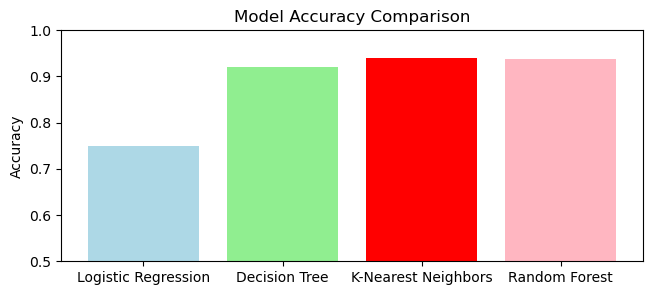

<function matplotlib.pyplot.show(close=None, block=None)>

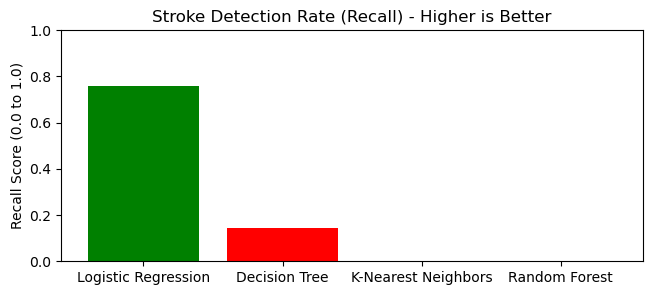

In [27]:
plt.figure(figsize=(7.5, 3))
plt.bar(results.keys(), results.values(), color=['lightblue', 'lightgreen', 'red', 'lightpink'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.show()

plt.figure(figsize=(7.5,3))
bars = plt.bar(recall_results.keys(), recall_results.values(), color=['green', 'red', 'red', 'red'])
plt.title('Stroke Detection Rate (Recall) - Higher is Better')
plt.ylabel('Recall Score (0.0 to 1.0)')
plt.ylim(0, 1.0)
plt.show


In [21]:
print("\nBest Model:", max(results, key=results.get))


Best Model: K-Nearest Neighbors
